In [1]:
import numpy as np
from sklearn.covariance import MinCovDet

**What strategies do you know (or can think of) in order to make PCA more robust?**


1. Data normalization: Normalizing the data before applying PCA can make it more robust
2. Incremental PCA: IPCA is a variant of PCA that processes the data in small batches,
       which can make it more computationally efficient and robust
3. Robust covariance estimation, use another method to calculate the covariance that is not sensitive to outliers,
       such as the Minimum Covariance Determinant (MCD) estimator
4. Primary Component Pursuit (PCP) approach: Use more robust optimization methods that are less sensitive to outliers

In [14]:
class PCA_robust:
    '''
    Data normalization: Normalizing the data before applying PCA can make it more robust
    Robust covariance estimation, use another method to calculate the covariance such as the Minimum Covariance Determinant (MCD) estimator
    '''

    def __init__(self, n_components):   
        #inicializa la clase con el número de componentes principales que se desean obtener.
        self.n_components = n_components
        self.mean = None
        self.components = None
    
    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        self.transform(X)

    def transform(self, X):
        # Normalize the data
        #X = (X - self.mean) / np.std(X, axis=0)
        X = (X - self.mean)
        # Estimate the robust covariance matrix (MCD)
        cov_matrix = MinCovDet().fit(X).covariance_
        
        # calcular los autovalores y autovectores de la matriz de covarianza
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # ordenar los autovalores y autovectores de mayor a menor
        sorted_indexes = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indexes]
        eigenvectors = eigenvectors[:, sorted_indexes]
        
        # seleccionar los primeros n_componentes autovectores
        self.components = eigenvectors[:, :self.n_components]
    
    def fit_transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed
    
    def inverse_transform(self, X): 
        X_reconstructed = (X @ self.components).dot(self.components.T) + np.mean(X, axis=0)      
        return X_reconstructed

**Let's start testing it with the wine dataset from sklearn Library**


In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


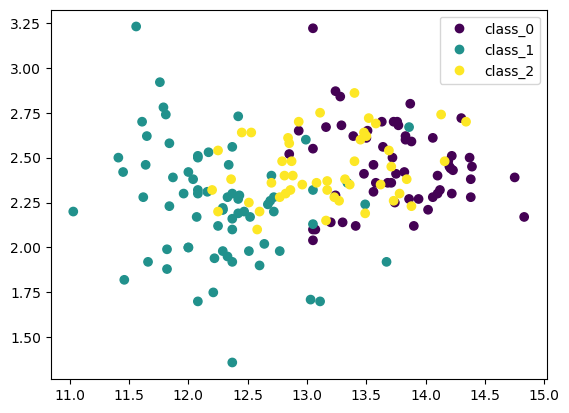

In [11]:
plot = plt.scatter(X[:,0], X[:,2], c=y)
plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))
plt.show()

In [15]:
# create a PCA robust object with 2 components
PCArobust = PCA_robust(n_components=2)
# fit the data
PCArobust_fit = PCArobust.fit(X)
# transform the data using the PCA object
PCArobust_transform= PCArobust.fit_transform(X)

print(PCArobust_transform.shape)


(178, 2)


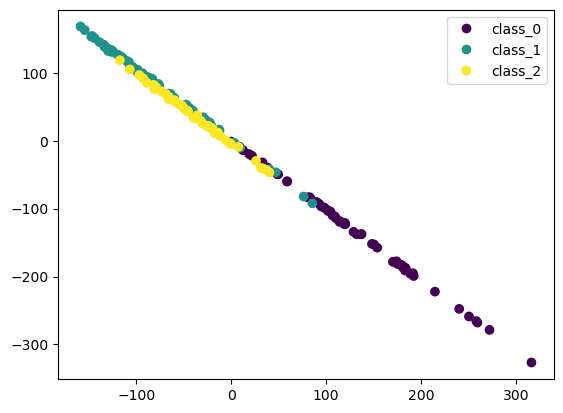

In [16]:
plot = plt.scatter(PCArobust_transform[:,0], PCArobust_transform[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()